In [6]:
from IPython.display import Image

# K-Nearest Neighbors Algorithm in Python

We are going to use the famous iris data set for our KNN example. 

### Pros
1. It is extremely easy to implement
2. As said earlier, it is lazy learning algorithm and therefore requires no training prior to making real time predictions. This makes the KNN algorithm much faster than other algorithms that require training e.g SVM, linear regression, etc.
3. Since the algorithm requires no training before making predictions, new data can be added seamlessly.
4. There are only two parameters required to implement KNN i.e. the number of neighbors K and the distance function (e.g. Euclidean or Manhattan etc.)

### Cons
1. The KNN algorithm doesn't work well with high dimensional data because with large number of dimensions, it becomes difficult for the algorithm to calculate distance in each dimension.
2. The KNN algorithm has a high prediction cost for large datasets. This is because in large datasets the cost of calculating distance between new point and each existing point becomes higher.
3. Finally, the KNN algorithm doesn't work well with categorical features since it is difficult to find the distance between dimensions with categorical features.

## Dataset
The dataset consists of four attributes(features): sepal-width, sepal-length, petal-width and petal-length. These are the attributes of specific types of iris plant. The task is to predict the class to which these plants belong. There are three classes in the dataset: Iris-setosa, Iris-versicolor and Iris-virginica. Further details of the dataset are available here.

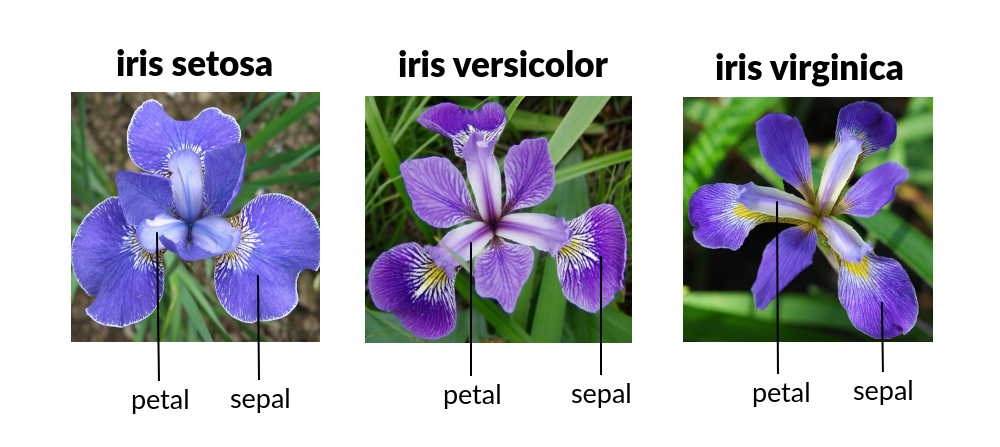

In [16]:
Image("iris-species.png")

## Step 1: Import Libraries

1. <b>NumPy</b> offers comprehensive mathematical functions, random number generators, linear algebra routines, Fourier transforms, and more.
2. <b>Matplotlib</b> is a comprehensive library for creating static, animated, and interactive visualizations.
3. <b>Pandas</b> stands for “Python Data Analysis Library”. 
It takes data (like a CSV or TSV file, or a SQL database) and creates a Python object with rows and columns called data frame that looks very similar to table in a statistical software
4. <b>scikit-learn (sklearn)</b> is a simple and efficient tools for predictive data analysis

In [16]:
# Import numpy, pandas
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


## Step 2: Importing the Dataset

To import the dataset and load it into our pandas dataframe, execute the following code:

In [10]:
# Assign the dataset address to url. 
#"https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

In [11]:
# Assign colum names to the dataset, 'sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class'
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']

Read a comma-separated values (csv) file into DataFrame.

In [12]:
# Read dataset to pandas dataframe
dataset = pd.read_csv(url, names = names)
dataset

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


View the dataset

In [14]:
# check the header
dataset.head()
dataset.tail()

,sepal-length,sepal-width,petal-length,petal-width,Class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


## Step 3: Split Training Set and Testing Set

Overfitting refers to a model that models the training data too well. 

Overfitting happens when a model learns the detail and noise in the training data to the extent that it negatively impacts the performance of the model on new data. This means that the noise or random fluctuations in the training data is picked up and learned as concepts by the model. The problem is that these concepts do not apply to new data and negatively impact the models ability to generalize.

To avoid over-fitting, we will divide our dataset into training and test splits, which gives us a better idea as to how our algorithm performed during the testing phase. This way our algorithm is tested on un-seen data, as it would be in a production application.

<b>pandas.DataFrame.iloc</b>:
Purely integer-location based indexing for selection by position.

In [32]:
# Preprocessing: The next step is to split our dataset into its attributes and labels.
# Assign the columns from the first to before the last columns to X
X = dataset.iloc[:,:-1].values
# Assign the last columns to y
y = dataset.iloc[:,4].values

X.shape
y.shape

(150,)

In [70]:
# from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=20)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.shape
y_train.shape

(100,)

## Step 4: Training and Predictions
Build a classifer with training dataset.


In [71]:
# from sklearn.neighbors import KNeighborsClassifier
# Build classifier
classifier = KNeighborsClassifier(n_neighbors = 5)
# fit the model with train set.(X_train, y_train)
classifier.fit(X_train, y_train)
print(classifier)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')


Apply the testing dataset inputs in the model we trained.

In [72]:
# predict
y_pred = classifier.predict(X_test)


## Step 5: Evaluating the Algorithm

In [73]:
# Evaluating the Algorithm
# from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.96

In [74]:
x=[1,2]
y=[2]
d=x+y
d

[1, 2, 2]